In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

# Gathering data

In [2]:
dummy_result = np.loadtxt("P_Coeffs_errors_circle_P:1.txt")

In [8]:
n_airfoil = np.loadtxt(f"n_airfoil.txt")
n_airfoil = list(map(int, n_airfoil))
ps = np.loadtxt(f"ps.txt")
ps = list(map(int, ps))
results_ellipse = np.empty((len(ps),dummy_result.shape[0],dummy_result.shape[1]))
results_circle = np.empty((len(ps),dummy_result.shape[0],dummy_result.shape[1]))
for i in ps:
    results_circle[i-1] = np.loadtxt(f"P_Coeffs_errors_circle_P:{i}.txt")
    results_ellipse[i-1] = np.loadtxt(f"P_Coeffs_errors_ellipse_P:{i}.txt")

# Circle line plot

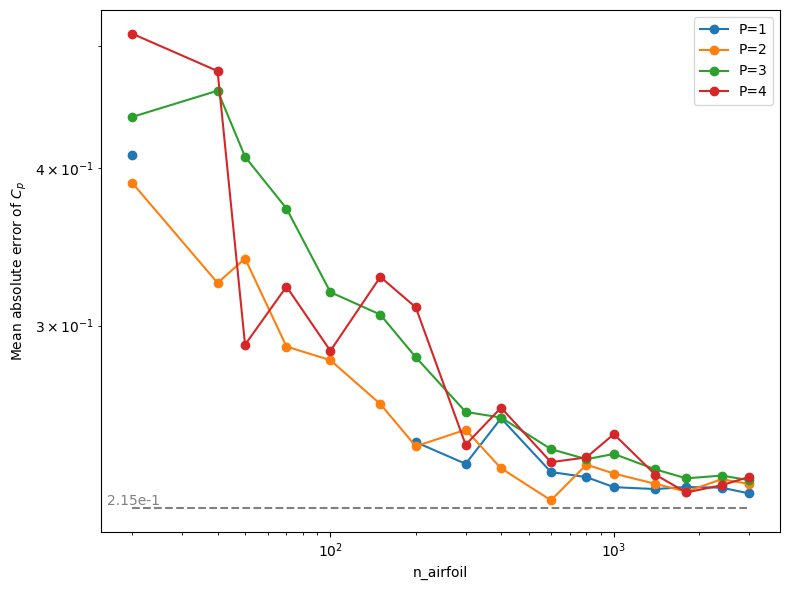

In [72]:
norm = results_circle[:,1,:]
circle_p1 = norm[0]
circle_p2 = norm[1]
circle_p3 = norm[2]
circle_p4 = norm[3]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(n_airfoil, circle_p1, label='P=1', marker='o')
ax.plot(n_airfoil, circle_p2, label='P=2', marker='o')
ax.plot(n_airfoil, circle_p3, label='P=3', marker='o')
ax.plot(n_airfoil, circle_p4, label='P=4', marker='o')
ax.plot(n_airfoil, np.ones(len(n_airfoil)) * 2.15e-1, linestyle='--', color='gray')
ax.text(2.5e+1, 2.15e-1, '2.15e-1', fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='gray')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('n_airfoil')
ax.set_ylabel('Mean absolute error of $C_p$')
#ax.set_title('Mean absolute error of $C_p$ for Circlular Vortex')
ax.legend()
plt.tight_layout()
plt.show()

# Elliptic line plot

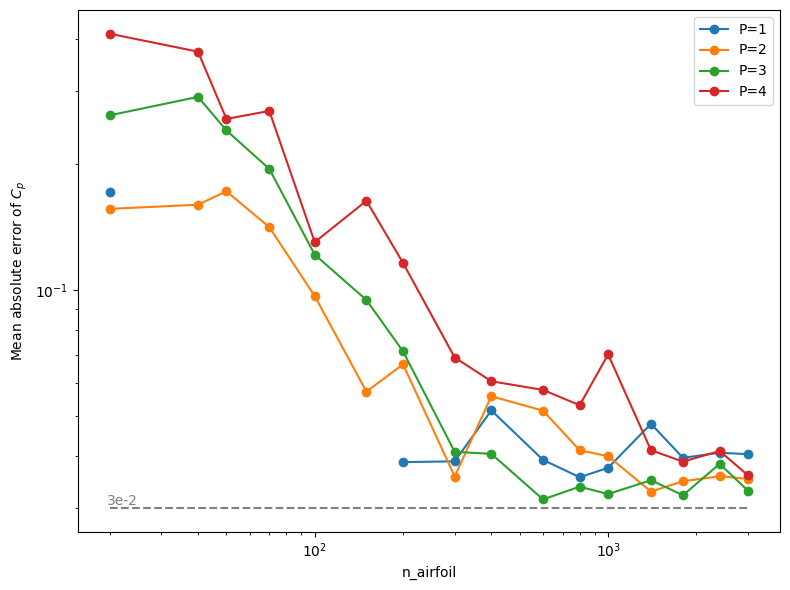

In [73]:
norm = results_ellipse[:,1,:]
elliptic_p1 = norm[0]
elliptic_p2 = norm[1]
elliptic_p3 = norm[2]
elliptic_p4 = norm[3]

fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog(n_airfoil, elliptic_p1, label='P=1', marker='o')
ax.loglog(n_airfoil, elliptic_p2, label='P=2', marker='o')
ax.loglog(n_airfoil, elliptic_p3, label='P=3', marker='o')
ax.loglog(n_airfoil, elliptic_p4, label='P=4', marker='o')
ax.plot(n_airfoil, np.ones(len(n_airfoil)) * 3e-2, linestyle='--', color='gray')
ax.text(2.5e+1, 3e-2, '3e-2', fontsize=10, verticalalignment='bottom', horizontalalignment='right', color='gray')
ax.set_yticks([1e-1])
ax.set_xlabel('n_airfoil')
ax.set_ylabel('Mean absolute error of $C_p$')
#ax.set_title('Mean absolute error of Pressure Coefficients using Elliptic Vortex')
ax.legend()
plt.tight_layout()
plt.show()

In [40]:
2e-2, 2*10**(-2)

(0.02, 0.02)

# Circle Heat maps

In [9]:
infnorm = results_circle[:,0,:]
meannorm = results_circle[:,1,:]
l2norm = results_circle[:,2,:]
times = results_circle[:,3,:]

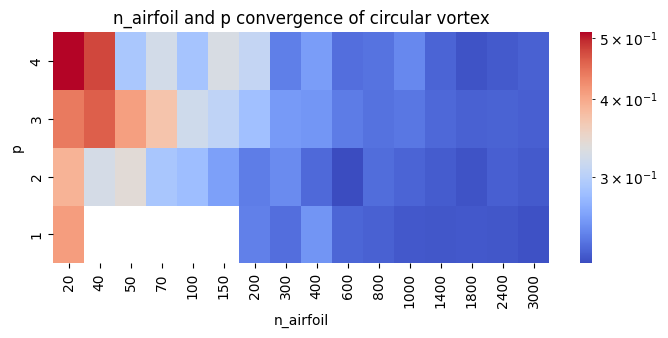

In [10]:
data = pd.DataFrame(meannorm[::-1,:], index=ps[::-1],
                         columns=n_airfoil)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Lav heatmap
fig, ax = plt.subplots(figsize=(8,3))
sns.heatmap(data, cmap='coolwarm', fmt=".2f", norm=LogNorm(vmin=data.min().min(), vmax=data.max().max()), ax=ax)

plt.title('n_airfoil and p convergence of circular vortex')
plt.xlabel('n_airfoil')
plt.ylabel('p')
plt.show()

# Ellipse heatmap

In [11]:
infnorm = results_ellipse[:,0,:]
meannorm = results_ellipse[:,1,:]
l2norm = results_ellipse[:,2,:]
times = results_ellipse[:,3,:]

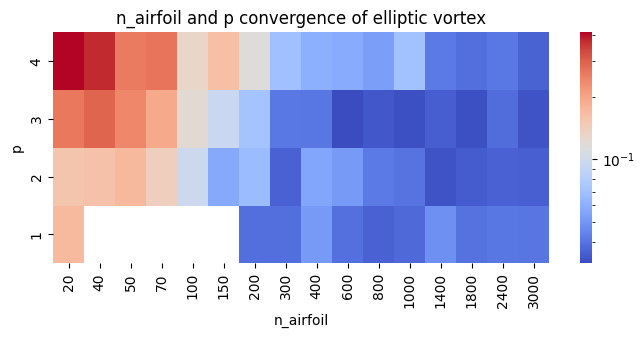

In [12]:
data = pd.DataFrame(meannorm[::-1,:], index=ps[::-1],
                         columns=n_airfoil)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Lav heatmap
fig, ax = plt.subplots(figsize=(8,3))
sns.heatmap(data, cmap='coolwarm', fmt=".2f", norm=LogNorm(vmin=data.min().min(), vmax=data.max().max()), ax=ax)

plt.title('n_airfoil and p convergence of elliptic vortex')
plt.xlabel('n_airfoil')
plt.ylabel('p')
plt.show()

# Old

NameError: name 'norms' is not defined

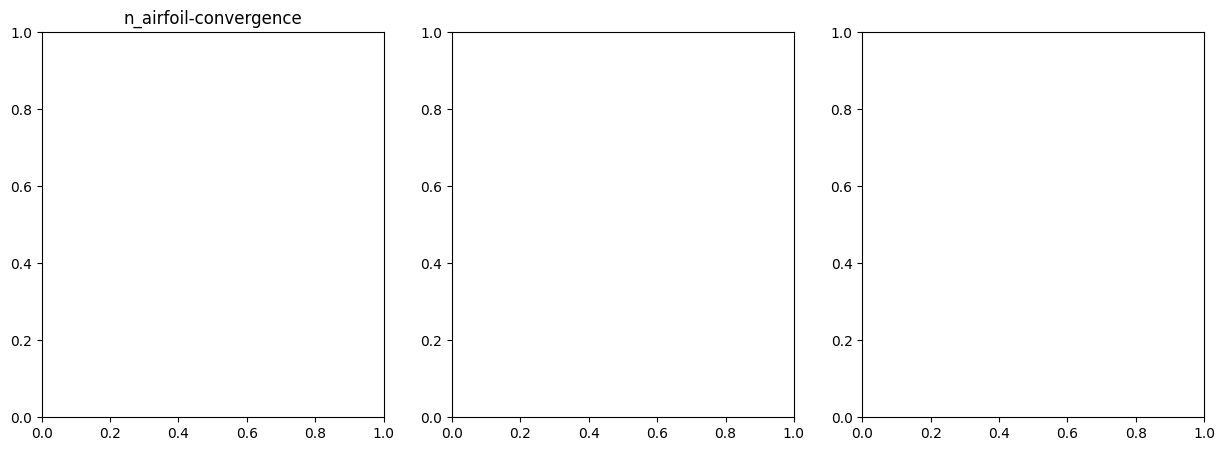

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# h-convergence
ax[0].set_title('n_airfoil-convergence')
ax[0].loglog(n_airfoil, norms, label='Error', marker='o')
ax[0].legend()
ax[0].set_xlabel('n_airfoil')
ax[0].set_ylabel('Error')


# time against h
ax[1].set_title('Time against n_airfoil')
ax[1].loglog(n_airfoil, times, label='Time', marker='o')
ax[1].set_xlabel('n_airfoil')
ax[1].set_ylabel('t')

# time against error
ax[2].set_title('Error against time')
ax[2].plot(norms, times, label='Time', marker='o')
ax[2].set_xscale('log')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('t [s]')


plt.show()

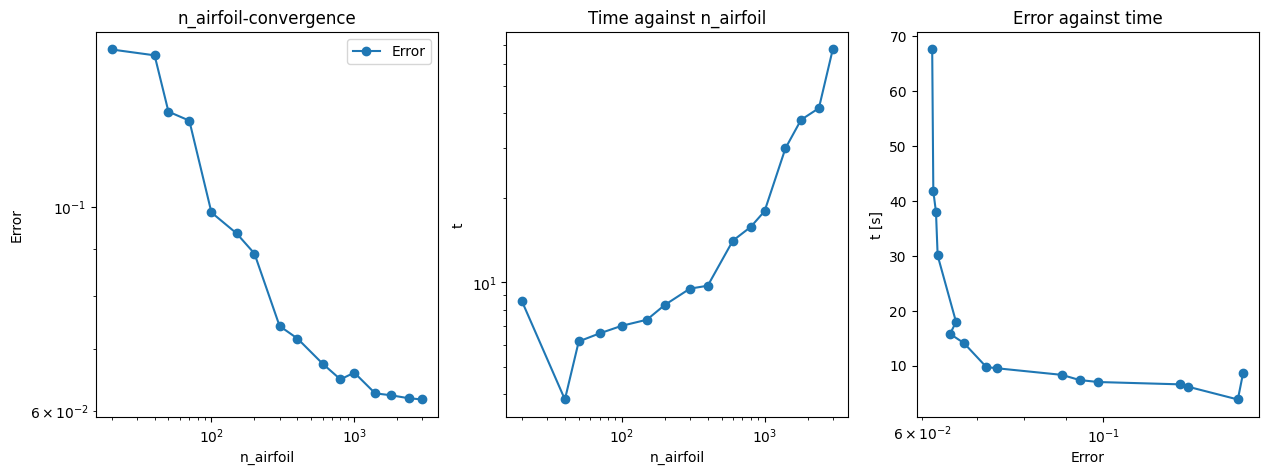

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# h-convergence
ax[0].set_title('n_airfoil-convergence')
ax[0].loglog(n_airfoil, infnorms, label='Error', marker='o')
ax[0].legend()
ax[0].set_xlabel('n_airfoil')
ax[0].set_ylabel('Error')


# time against h
ax[1].set_title('Time against n_airfoil')
ax[1].loglog(n_airfoil, inftimes, label='Time', marker='o')
ax[1].set_xlabel('n_airfoil')
ax[1].set_ylabel('t')

# time against error
ax[2].set_title('Error against time')
ax[2].plot(infnorms, inftimes, label='Time', marker='o')
ax[2].set_xscale('log')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('t [s]')


plt.show()

In [ ]:
results = np.loadtxt("/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/P_Coeff_Convergence/P_Coeffs_point_p.txt")
results2 = np.loadtxt("/home/firedrake/Projects/Bachelor/F25_Bachelor_NACA_SEM/Visualisation/P_Coeff_Convergence/P_Coeffs_point_circle_p.txt")

In [ ]:
p = results[0,:]
norms = results[1,:]/45
times = results[2,:]
infnorms = results2[1,:]/45
inftimes = results2[2,:]

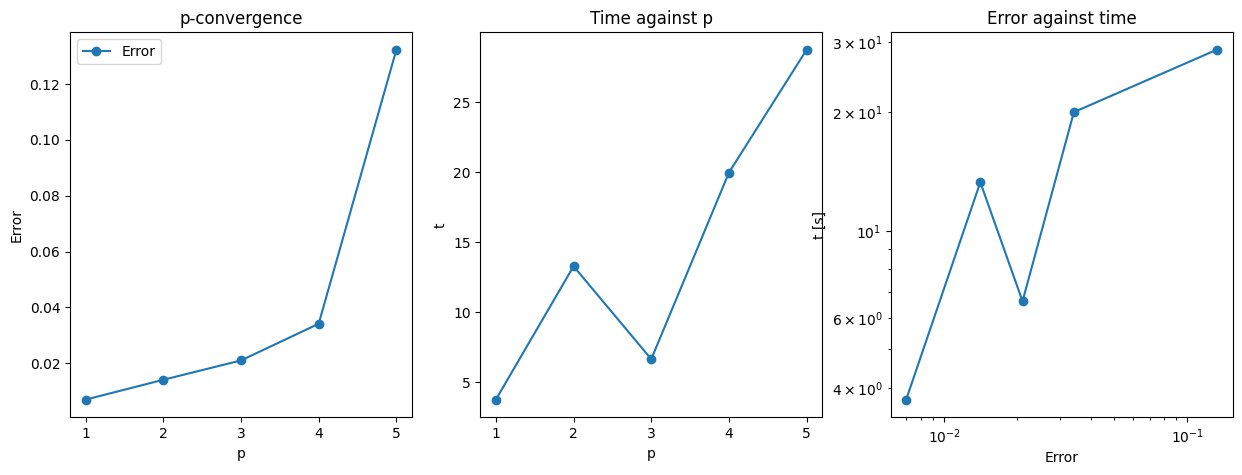

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# h-convergence
ax[0].set_title('p-convergence')
ax[0].plot(p, norms, label='Error', marker='o')
ax[0].legend()
ax[2].set_yscale('log')
ax[0].set_xlabel('p')
ax[0].set_ylabel('Error')


# time against h
ax[1].set_title('Time against p')
ax[1].plot(p, times, label='Time', marker='o')
ax[2].set_yscale('log')
ax[1].set_xlabel('p')
ax[1].set_ylabel('t')

# time against error
ax[2].set_title('Error against time')
ax[2].plot(norms, times, label='Time', marker='o')
ax[2].set_xscale('log')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('t [s]')


plt.show()

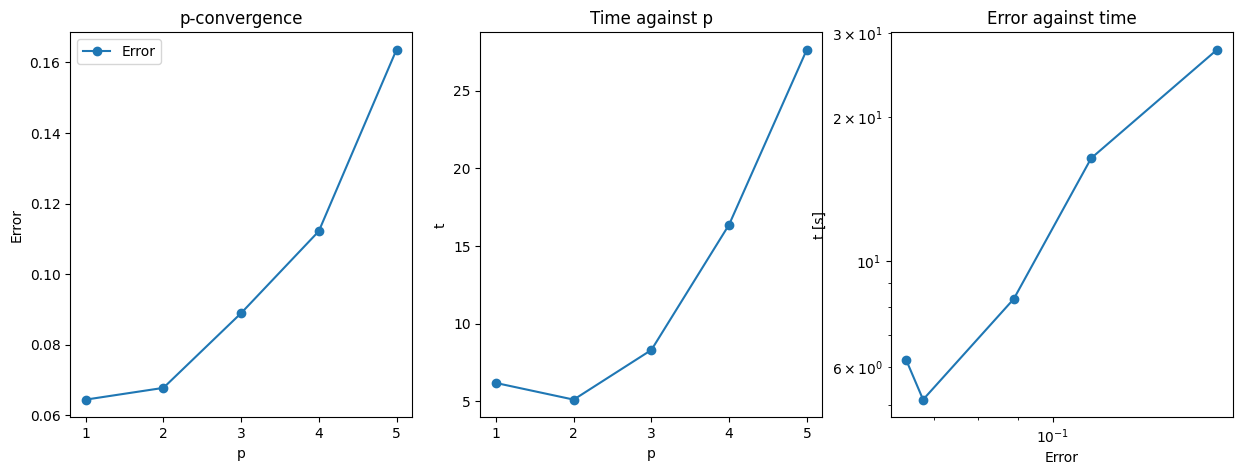

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# h-convergence
ax[0].set_title('p-convergence')
ax[0].plot(p, infnorms, label='Error', marker='o')
ax[0].legend()
ax[2].set_yscale('log')
ax[0].set_xlabel('p')
ax[0].set_ylabel('Error')


# time against h
ax[1].set_title('Time against p')
ax[1].plot(p, inftimes, label='Time', marker='o')
ax[2].set_yscale('log')
ax[1].set_xlabel('p')
ax[1].set_ylabel('t')

# time against error
ax[2].set_title('Error against time')
ax[2].plot(infnorms, inftimes, label='Time', marker='o')
ax[2].set_xscale('log')
ax[2].set_xlabel('Error')
ax[2].set_ylabel('t [s]')


plt.show()

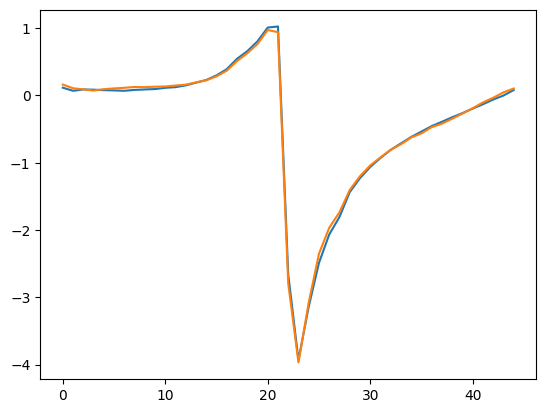

In [ ]:
nasavals = list(map(float, "1.1470e-01  6.8400e-02  8.8200e-02  8.4900e-02  7.8200e-02  7.3900e-02 6.8500e-02  8.1300e-02  8.8400e-02  9.4000e-02  1.1250e-01  1.2250e-01 1.4880e-01  1.8930e-01  2.2920e-01  2.9730e-01  3.9000e-01  5.4350e-01 6.5630e-01  8.0310e-01  1.0081e+00  1.0241e+00 -2.6598e+00 -3.9314e+00 -3.1386e+00 -2.4889e+00 -2.0671e+00 -1.8066e+00 -1.4381e+00 -1.2297e+00 -1.0638e+00 -9.3000e-01 -8.0940e-01 -7.1310e-01 -6.1820e-01 -5.3740e-01 -4.5630e-01 -3.9210e-01 -3.2470e-01 -2.6360e-01 -1.9640e-01 -1.3180e-01 -6.1300e-02 -2.1000e-03  7.9500e-02".split()))
ownvals = [
    0.16097674, 0.10625255, 0.08995475, 0.07127912, 0.09243295, 0.10359871,
    0.11283148, 0.12545281, 0.12323727, 0.12902978, 0.13278607, 0.14651914,
    0.15978287, 0.19335302, 0.22342624, 0.28273973, 0.36692048, 0.5098082,
    0.62534985, 0.76268765, 0.97156452, 0.93912864, -2.79445863, -3.9683722,
    -3.07853772, -2.3526006, -1.96719068, -1.73646006, -1.40643831, -1.20042042,
    -1.04138466, -0.92127161, -0.80727618, -0.7261637, -0.62571988, -0.56479795,
    -0.47136629, -0.42046585, -0.34650846, -0.27051781, -0.191299, -0.10435782,
    -0.03501157, 0.04520911, 0.10255503
]
plt.plot(nasavals)
plt.plot(ownvals)